# Demonstration File

In [1]:
#Import necessary libraries

import sys
import os

# Make it so you can get modules from the parent directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

import test_manifold_algorithms as tma
from MASH import MASH
from SPUD import SPUD
from temporal_progression_comparisons import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Prep the domains
#dc = tma.test_manifold_algorithms("seeds.csv", split = "even", verbose = 3, random_state=2816)

2024-08-13 15:35:34.577537: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 15:35:34.583440: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 15:35:34.686292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 15:35:36.641000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



This is not running as __main__


# Testing with Profile Variables

<><><><><><><><><><><><><>  Processed Finished  <><><><><><><><><><><><><>


c:\Users\jcory\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Can't calculate the Cross embedding
FOSCTTM: 0.0


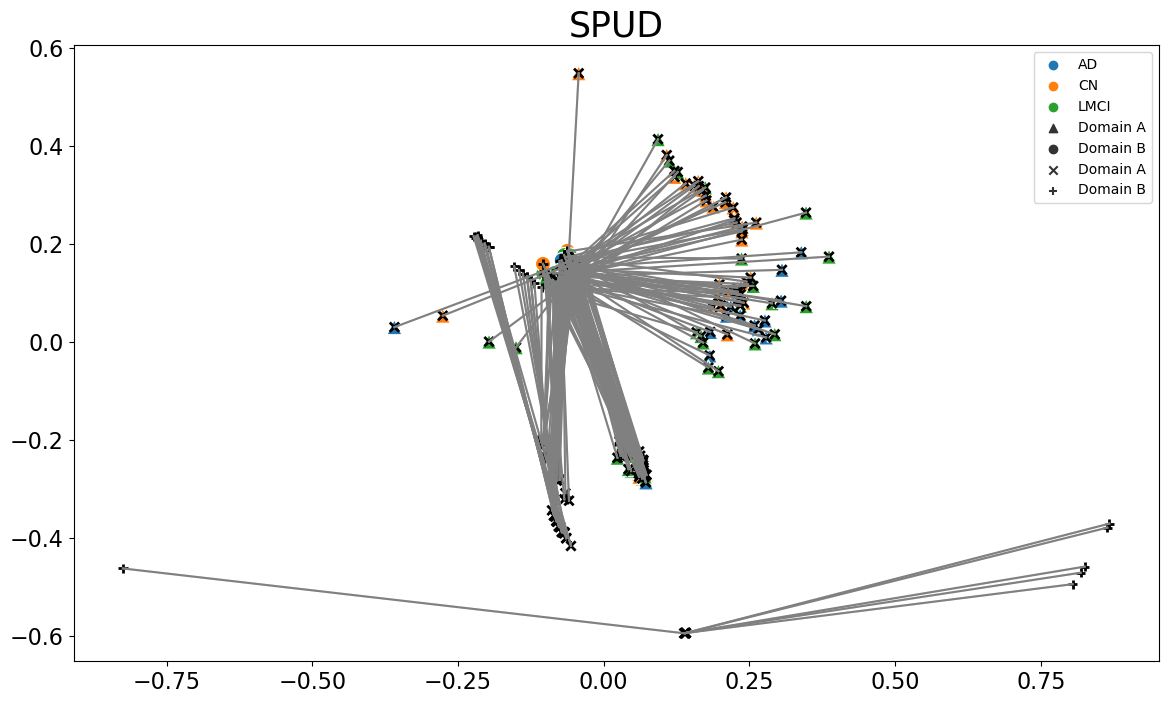

In [14]:
LABEL_VARIABLE = "DX_bl"
SAMPLE_SIZE = 200
profile_raw = pd.read_excel(r"..\..\CSV Files\Profile Variables 2024-07-31.xlsx", index_col="RID")
label_column = profile_raw[LABEL_VARIABLE]

#remap a few variables, might make part of the merge later
profile_raw['DX_bl'] = profile_raw['DX_bl'].map({'CN': 0, 'SMC': 1, 'EMCI': 2, 'LMCI': 3, 'AD': 4, 'NaN': -4})
profile_raw['PTMARRY'] = profile_raw['PTMARRY'].map({'Married': 1, 'Widowed': 2, 'Divorced': 3, 'Never married': 4, 'Unknown': -4, 'NaN': -4})
profile_raw.fillna(-4, inplace=True)

#get rid of problematic columns and patients with no data
profile = profile_raw.drop(columns = ["PTRACCAT"]).dropna(how="all")

domain_a = np.array(profile)[:SAMPLE_SIZE, :20].astype(float)
domain_b = np.array(profile)[:SAMPLE_SIZE, 20:].astype(float)

profile_anchors = [[x,x] for x in range(len(domain_a))]

spud_time = SPUD(knn = 2, verbose = 2)
spud_time.fit(dataA = domain_a, dataB = domain_b, known_anchors=profile_anchors)

#spud_time.plot_heat_map()
spud_time.plot_emb(labels = pd.concat([label_column[:SAMPLE_SIZE], label_column[:SAMPLE_SIZE]]))

# Testing with Profile and Visit variables

In [44]:
#Create dataclasses. Note, we want to distort to leave domain unchanged
#profile_data = tma.test_manifold_algorithms("Profile Variables 2024-07-09.csv", split = "distort", verbose = 3, random_state=2816)
#visits_data = tma.test_manifold_algorithms("Visit Variables 2024-07-09.csv", split = "distort", verbose = 3, random_state=2816)
profile_data = profile
visits_data = pd.read_excel(r"C:\Users\jcory\Box\Graph-Manifold-Alignment\CSV Files\Visit Variables 2024-08-01.xlsx", index_col = [0])


In [46]:
#build the anchors list from the indecies of the corresponding RID labels
profile_labels = list(profile_data.index.values)
visits_labels = list(visits_data.index.values)

#for each visit on record, create an anchor that connects it to the approprate profile entry
#note that every visit will have an anchor but some of the profiles will not because they dropped out of the study
anchors = []
for x in range(len(visits_labels)):
    rid = visits_labels[x]
    corresponding_profile_position = profile_labels.index(rid)
    new_anchor = [corresponding_profile_position, x]
    anchors.append(new_anchor)

In [47]:
#Create the subsets to be used for each domain
domain_a = np.array(profile_data)[:52, :].astype(float) #there are 52 profiles represented in the first 200 visits
domain_b = np.array(visits_data)[:200, :].astype(float)
#Reset NaN values to be -4 :)
domain_a[np.isnan(domain_a)] = -4
domain_b[np.isnan(domain_b)] = -4

#Lets subset the data
#profile_data.split_A = profile_data.split_A[:SUBSET_VAL]
#visits_data.split_A = visits_data.split_A[:max(TV_anchors[:, 1])+1]

In [48]:
len(anchors), len(domain_a), len(domain_b), anchors[-10:]

(11575,
 52,
 200,
 [[4058, 11565],
  [4065, 11566],
  [4069, 11567],
  [4069, 11568],
  [4077, 11569],
  [4080, 11570],
  [4084, 11571],
  [4085, 11572],
  [4086, 11573],
  [4088, 11574]])

In [53]:
#Create the merged values --> This will take up the rest of your day
pv_spud = SPUD(n_pca = 10)
pv_spud.fit(domain_a, domain_b, known_anchors = anchors[:200])

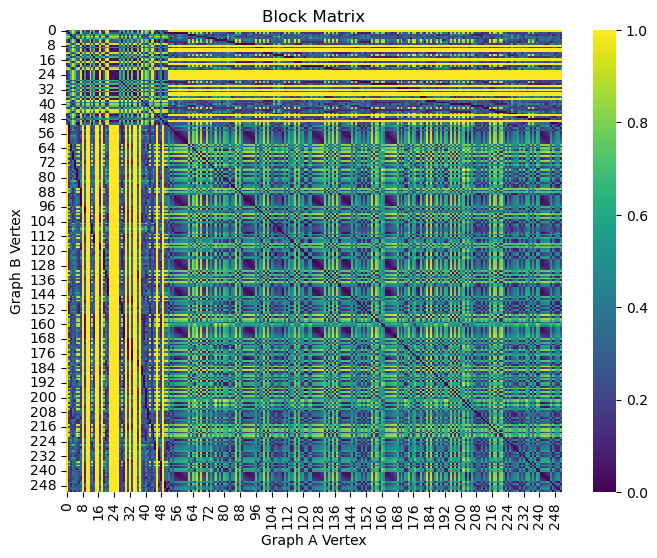

In [54]:
pv_spud.plot_heat_map()

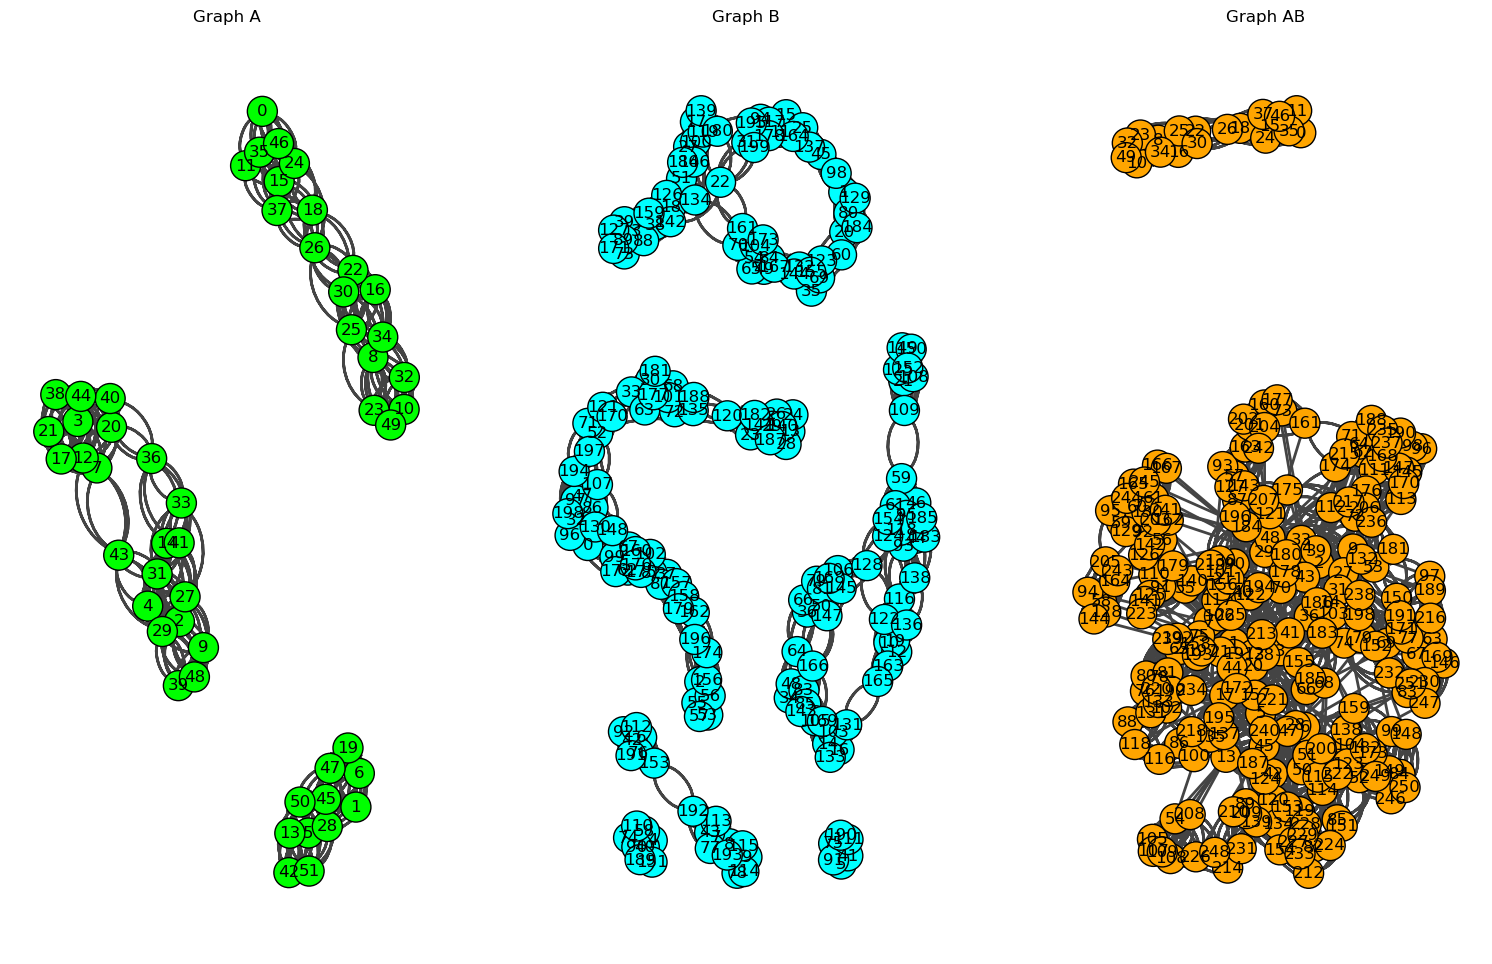

Cross Embedding: 0.3194230769230769
Can't compute FOSCTTM with different domain shapes.


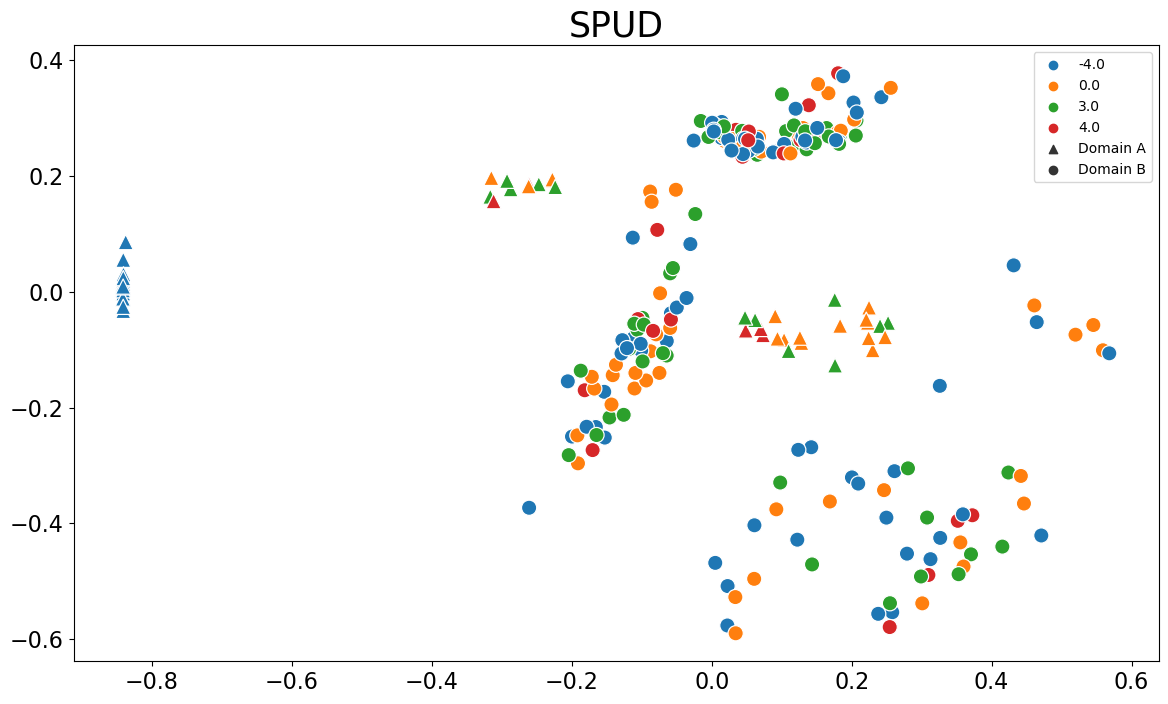

In [58]:
labels = pd.concat([profile["DX_bl"][:52], profile["DX_bl"][:200]])

pv_spud.plot_graphs()
pv_spud.plot_emb(labels = labels, show_anchors = False, show_lines = False, n_comp = 2)

# Testing with Profile and Progression Variables

In [3]:
from temporal_progression_comparisons import *
import numpy as np
import pandas as pd

progressions_data = pd.read_excel(r"C:\Users\jcory\Box\Graph-Manifold-Alignment\CSV Files\Progression Variables 2024-08-02.xlsx", index_col=[0,1])

def get_distances(data, distance_measure):
    if callable(distance_measure):
        return distance_measure(data)
    
final = get_distances(df, wrapped_euclidean_distances)

2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
10
10
10
10
10
10
10
10
10
10
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
